# Creating a motif finder


In [1]:
import os
import random
from time import time
import pandas as pd
import numpy as np
import networkx as nx
import itertools

# only allow 100 rows to display pandas
pd.set_option('display.max_rows', 100)

In [4]:
syn_table = pd.read_csv('/Users/rweberla/Downloads/connections_no_threshold.csv')
syn_table

,pre_root_id,post_root_id,neuropil,syn_count,nt_type
0,720575940629970489,720575940631267655,AVLP_R,7,GABA
1,720575940623828999,720575940612348950,SLP_R,4,GLUT
2,720575940624078484,720575940616950161,SMP_R,2,ACH
3,720575940629583345,720575940620324735,SMP_L,2,GLUT
4,720575940605876866,720575940606514878,LAL_R,15,GABA
...,...,...,...,...,...
16847992,720575940615769750,720575940622822680,AVLP_L,1,ACH
16847993,720575940624016823,720575940622760993,ME_R,4,ACH
16847994,720575940637397309,720575940633255123,SLP_R,2,GABA
16847995,720575940636432014,720575940617470681,ME_R,1,GLUT


In [5]:
# Find all unique cell ids in both the pre and post columns
cellids =  np.unique(syn_table[["pre_root_id", "post_root_id"]])
print(len(cellids))

138639


In [6]:
# Create a dictionary that maps cell ids to index id values
nid2cid = {i: cid for i, cid in enumerate(cellids)} 

In [7]:
# Create a dictionary that maps index id values to cell ids, may not be needed
cid2nid = {cid: i for i, cid in enumerate(cellids)}

In [8]:
# Add the index id values to the syn_table for pre and post columns
syn_table["pre_nid"] = pd.Series([cid2nid[cid] for cid in syn_table["pre_root_id"]], 
		index=syn_table.index)
syn_table["post_nid"] = pd.Series([cid2nid[cid] for cid in syn_table["post_root_id"]], 
		index=syn_table.index)

In [9]:
syn_table

,pre_root_id,post_root_id,neuropil,syn_count,nt_type,pre_nid,post_nid
0,720575940629970489,720575940631267655,AVLP_R,7,GABA,96274,103137
1,720575940623828999,720575940612348950,SLP_R,4,GLUT,62790,13822
2,720575940624078484,720575940616950161,SMP_R,2,ACH,64248,29086
3,720575940629583345,720575940620324735,SMP_L,2,GLUT,94318,42941
4,720575940605876866,720575940606514878,LAL_R,15,GABA,2405,3347
...,...,...,...,...,...,...,...
16847992,720575940615769750,720575940622822680,AVLP_L,1,ACH,24961,57182
16847993,720575940624016823,720575940622760993,ME_R,4,ACH,63889,56848
16847994,720575940637397309,720575940633255123,SLP_R,2,GABA,122411,111854
16847995,720575940636432014,720575940617470681,ME_R,1,GLUT,120280,30981


## Found this function called triads_by_type in networkx
This allows you to create a directed graph and find all triads in this reference:
- Snijders, T. (2012). “Transitivity and triads.” University of Oxford. https://web.archive.org/web/20170830032057/http://www.stats.ox.ac.uk/~snijders/Trans_Triads_ha.pdf

Our motif is the "120U". We will probably need to use the HPC to do the whole connectome

In [102]:
# Isolated test for exact motif we want
e_test= [(11,21), (21,10), (21,11), (11,10)]
df_test = pd.DataFrame(columns=["s", "t"], data = e_test)
v_test = np.unique(df_test[["s", "t"]])
df_test

,s,t
0,11,21
1,21,10
2,21,11
3,11,10


In [83]:
matches

{1: []}

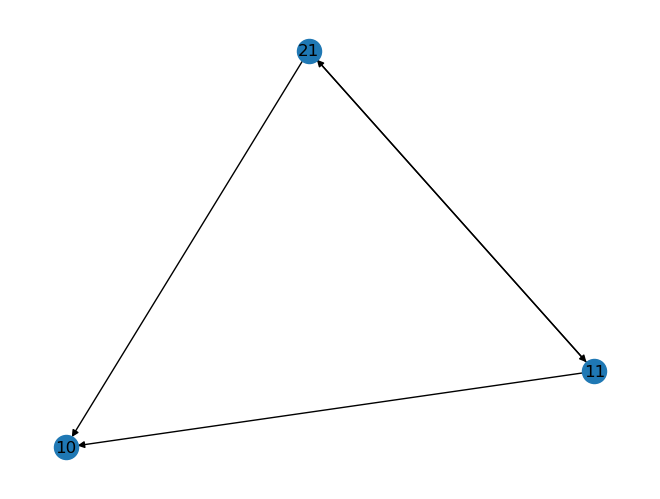

In [108]:
G = nx.DiGraph()
# Add the edges to the graph from dataframe
G.add_edges_from(df_test.values)

# Plot the graph
nx.draw(G, with_labels=True)

In [111]:
triads = nx.triads_by_type(G)
triads

defaultdict(list,
            {'120U': [<networkx.classes.digraph.DiGraph at 0x4fe055220>]})

In [112]:
t_final = dict(triads)
t_final

{'120U': [<networkx.classes.digraph.DiGraph at 0x4fe055220>]}

In [115]:
t_final['120U'][0].edges

OutEdgeView([(11, 21), (11, 10), (21, 10), (21, 11)])

### Now testing this on real smaller data

In [104]:
# Isolate the pre_nid and post_nid columns with syn_count (Testing)
syn_table_limit = syn_table[["pre_nid", "post_nid"]]
syn_table_test=syn_table_limit[:100]

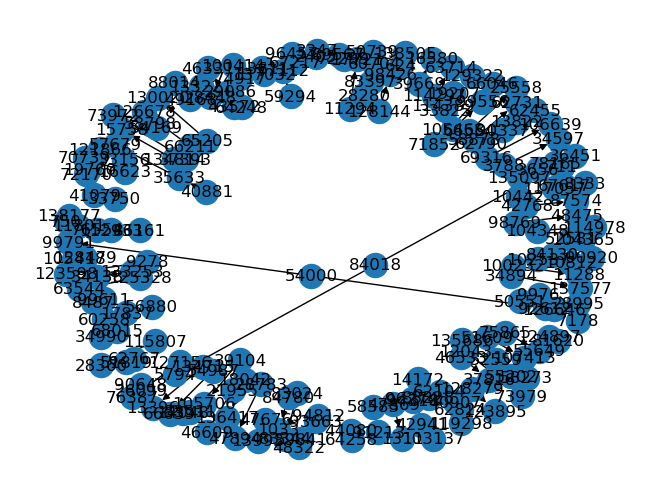

In [105]:
G = nx.DiGraph()
# Add the edges to the graph from dataframe
G.add_edges_from(syn_table_test.values)

# Plot the graph
nx.draw(G, with_labels=True)

In [107]:
triads = nx.triads_by_type(G)
triads

defaultdict(list,
            {'012': [<networkx.classes.digraph.DiGraph at 0x46e430080>,
              ...],
             '003': [<networkx.classes.digraph.DiGraph at 0x46e43e3f0>,
              ...],
             '021C': [<networkx.classes.digraph.DiGraph at 0x496428c50>],
             '021U': [<networkx.classes.digraph.DiGraph at 0x4aa3ff020>,
             '021D': [<networkx.classes.digraph.DiGraph at 0x4d4a5d910>,
              <networkx.classes.digraph.DiGraph at 0x4e3be06b0>]})

In [ ]:
traids['']